# Triton Practices

Chunwei Yan

## Handcrafted kernels in GNN scenerios

### index_select

In [1]:
!echo $PYTHONPATH

/home/chunwei/project/triken:/home/chunwei/project/triken


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 6]

In [4]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1024,
        'height': 1024,
        'scroll': True,
})

{'width': 1024, 'height': 1024, 'scroll': True}

In [7]:
from benchmarks.test_gnn import test_index_select, test_gather, test_scatter

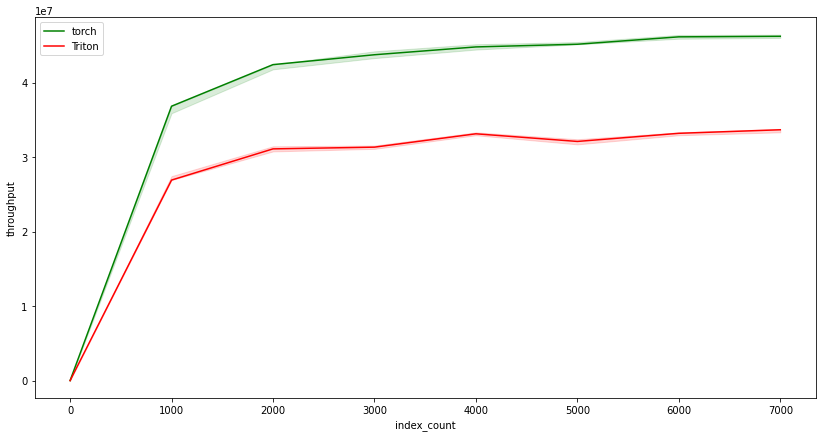

index_select performance: input_shape=[2431, 1433] dim=0:
   index_count         torch        Triton
0          0.0  0.000000e+00  0.000000e+00
1       1000.0  3.682669e+07  2.691181e+07
2       2000.0  4.240649e+07  3.109809e+07
3       3000.0  4.373169e+07  3.133017e+07
4       4000.0  4.478125e+07  3.312223e+07
5       5000.0  4.514239e+07  3.209665e+07
6       6000.0  4.613453e+07  3.318768e+07
7       7000.0  4.620707e+07  3.366288e+07


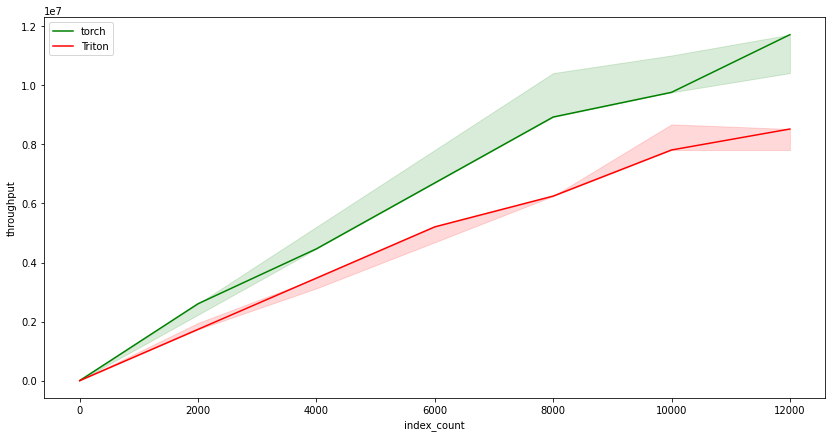

index_select performance: input_shape=[2708, 8] dim=0:
   index_count         torch        Triton
0          0.0  0.000000e+00  0.000000e+00
1       2000.0  2.604167e+06  1.736111e+06
2       4000.0  4.464286e+06  3.472222e+06
3       6000.0  6.696428e+06  5.208333e+06
4       8000.0  8.928571e+06  6.250000e+06
5      10000.0  9.765625e+06  7.812500e+06
6      12000.0  1.171875e+07  8.522727e+06


In [8]:
for instance in [
    test_index_select(shape=[2431, 1433], index_count_range=range(
        0, 7851, 1000)),
    test_index_select(shape=[2708, 8], index_count_range=range(
        0, 13264, 2000)),
]:
    instance.run(show_plots=True, print_data=True)


#### gather

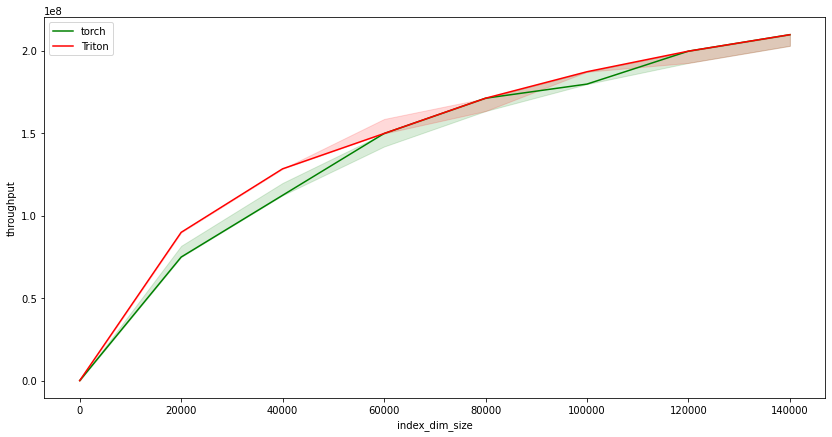

gather performance, input_shape=(148082, 46), dim=0:
   index_dim_size         torch        Triton
0             1.0  8.984375e+03  8.984375e+03
1         20001.0  7.487353e+07  8.984824e+07
2         40001.0  1.123075e+08  1.283514e+08
3         60001.0  1.497421e+08  1.497421e+08
4         80001.0  1.711331e+08  1.711331e+08
5        100001.0  1.796893e+08  1.871763e+08
6        120001.0  1.996544e+08  1.996544e+08
7        140001.0  2.096369e+08  2.096369e+08


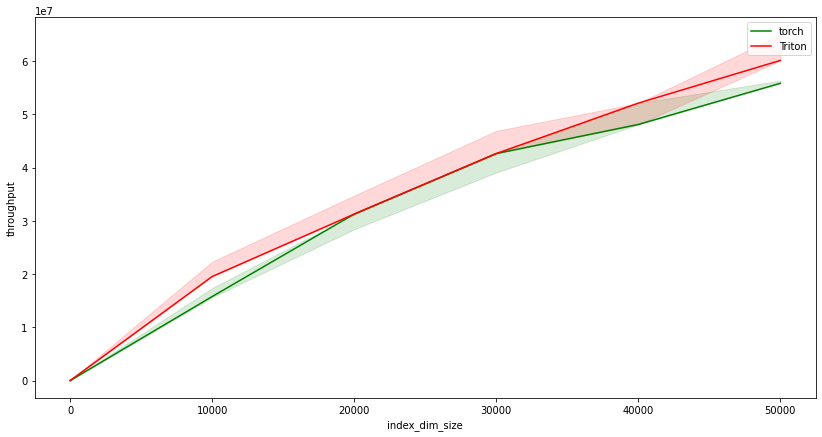

gather performance, input_shape=(6909, 4), dim=0:
   index_dim_size         torch        Triton
0             1.0  2.604167e+03  3.125000e+03
1         10001.0  1.577445e+07  1.953320e+07
2         20001.0  3.125156e+07  3.125156e+07
3         30001.0  4.261506e+07  4.261506e+07
4         40001.0  4.807813e+07  5.208463e+07
5         50001.0  5.580469e+07  6.009736e+07


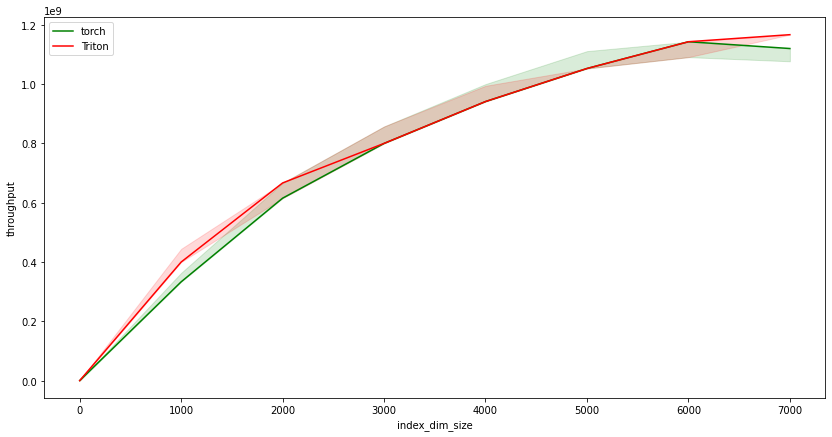

gather performance, input_shape=(2431, 64), dim=0:
   index_dim_size         torch        Triton
0             1.0  6.666666e+05  6.666666e+05
1          1001.0  3.336667e+08  4.004000e+08
2          2001.0  6.156923e+08  6.670000e+08
3          3001.0  8.002667e+08  8.002667e+08
4          4001.0  9.414117e+08  9.414117e+08
5          5001.0  1.052842e+09  1.052842e+09
6          6001.0  1.143048e+09  1.143048e+09
7          7001.0  1.120160e+09  1.166833e+09


In [9]:
for instance in [
    test_gather(index_shape_fn=lambda x: (x, 1),
                dim=0,
                index_dim_len_range=range(1, 148082, 20000),
                input_shape=(148082, 46)),
    test_gather(index_shape_fn=lambda x: (x, 4),
                dim=0,
                index_dim_len_range=range(1, 54024, 10000),
                input_shape=(6909, 4)),
    test_gather(index_shape_fn=lambda x: (x, 64),
                dim=0,
                index_dim_len_range=range(1, 7851, 1000),
                input_shape=(2431, 64)),
]:

    instance.run(show_plots=True, print_data=True)

#### scatter

/home/chunwei/project/triken/benchmarks/test_gnn.py:127: UserWarning: The reduce argument of torch.scatter with Tensor src is deprecated and will be removed in a future PyTorch release. Use torch.scatter_reduce instead for more reduction options. (Triggered internally at ../aten/src/ATen/native/TensorAdvancedIndexing.cpp:224.)
  lambda: out.scatter_(dim, index, src, reduce=reduce), rep=100)


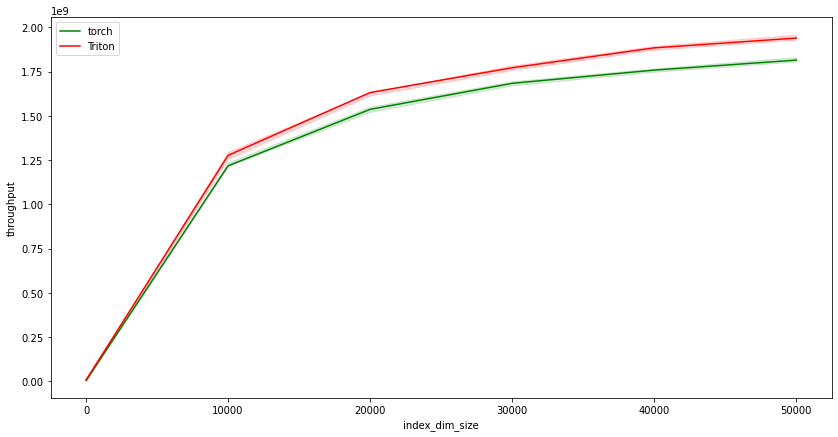

scatter performance, out_shape=(6909, 90), dim=0, reduce=add:
   index_dim_size         torch        Triton
0             5.0  4.943848e+06  7.910156e+06
1         10005.0  1.217556e+09  1.276470e+09
2         20005.0  1.536337e+09  1.631368e+09
3         30005.0  1.683293e+09  1.771226e+09
4         40005.0  1.758032e+09  1.883606e+09
5         50005.0  1.814437e+09  1.938958e+09


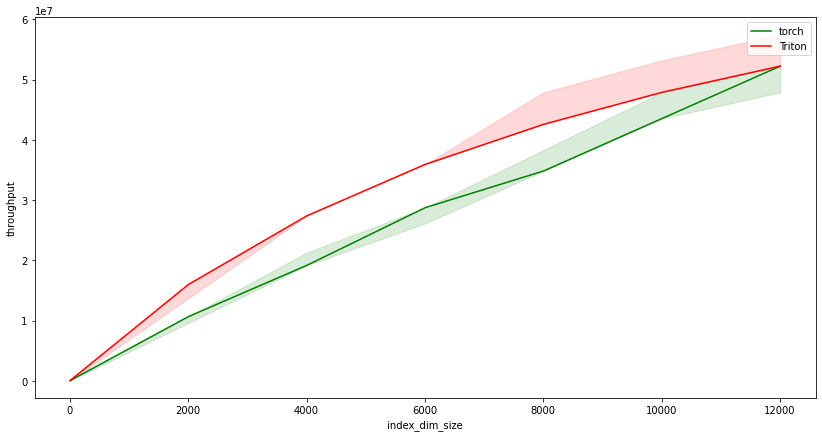

scatter performance, out_shape=(2708, 7), dim=0, reduce=add:
   index_dim_size         torch        Triton
0             5.0  4.050926e+04  4.785156e+04
1          2005.0  1.066026e+07  1.599040e+07
2          4005.0  1.916455e+07  2.737793e+07
3          6005.0  2.873486e+07  3.591858e+07
4          8005.0  3.482289e+07  4.256130e+07
5         10005.0  4.352317e+07  4.787549e+07
6         12005.0  5.222345e+07  5.222345e+07


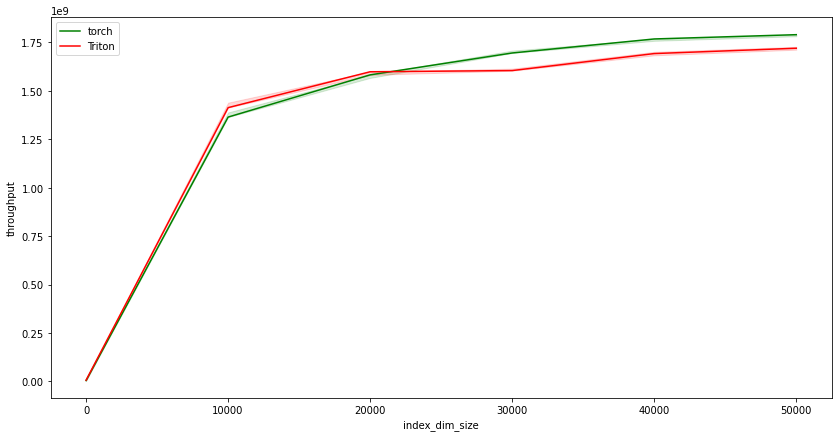

scatter performance, out_shape=(6909, 90), dim=0, reduce=None:
   index_dim_size         torch        Triton
0             5.0  4.394531e+06  6.626309e+06
1         10005.0  1.364502e+09  1.413234e+09
2         20005.0  1.582427e+09  1.598411e+09
3         30005.0  1.695316e+09  1.604524e+09
4         40005.0  1.767699e+09  1.692224e+09
5         50005.0  1.789807e+09  1.719771e+09


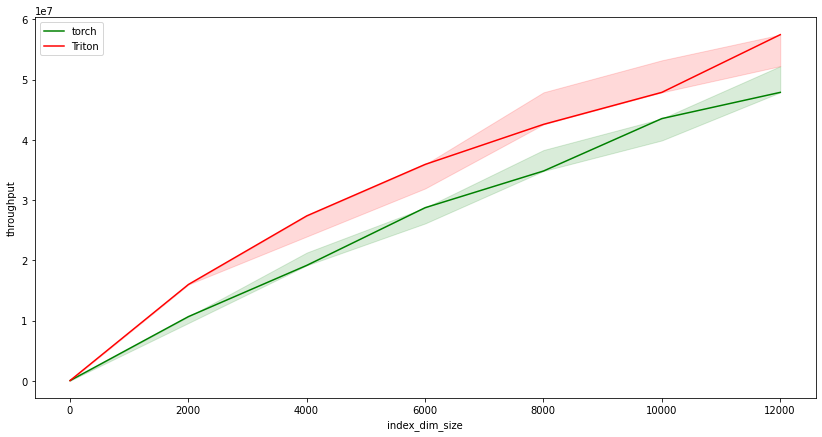

scatter performance, out_shape=(2708, 7), dim=0, reduce=None:
   index_dim_size         torch        Triton
0             5.0  4.094251e+04  4.785156e+04
1          2005.0  1.066026e+07  1.599040e+07
2          4005.0  1.916455e+07  2.737793e+07
3          6005.0  2.873486e+07  3.591858e+07
4          8005.0  3.482289e+07  4.256130e+07
5         10005.0  4.352317e+07  4.787549e+07
6         12005.0  4.787150e+07  5.744580e+07


In [10]:
for scatter in [
    test_scatter(index_shape_fn=lambda x: (x, 90),
                    dim=0,
                    index_dim_len_range=range(5, 54024, 10000),
                    out_shape=(6909, 90),
                    reduce="add"),
    test_scatter(index_shape_fn=lambda x: (x, 7),
                    dim=0,
                    index_dim_len_range=range(5, 13264, 2000),
                    out_shape=(2708, 7),
                    reduce="add"),
    test_scatter(index_shape_fn=lambda x: (x, 90),
                    dim=0,
                    index_dim_len_range=range(5, 54024, 10000),
                    out_shape=(6909, 90),
                    reduce=None),
    test_scatter(index_shape_fn=lambda x: (x, 7),
                    dim=0,
                    index_dim_len_range=range(5, 13264, 2000),
                    out_shape=(2708, 7),
                    reduce=None),

]:
    scatter.run(show_plots=True, print_data=True)

### Some practices

### 1. A jit kernel could call another jit functions, thus helper function reusing is possible

This makes reusing with helper functions possible.

In [2]:
import triton.language as tl
import triton
from typing import *
import torch

# helper function 
@triton.jit
def add_inner(a, b):
    return a + b

@triton.jit
def add_outer(A, B, Out, N:tl.constexpr):
    off = tl.arange(0, N)
    a = tl.load(A + off)
    b = tl.load(B + off)
    out = add_inner(a, b)
    tl.store(Out+off, out)

grid = lambda meta: (1,)
a = torch.randn(32, device='cuda')
b = torch.randn(32, device='cuda')
out = torch.empty_like(a)
add_outer[grid](a, b, out, 32)
#assert torch.testing.assert_close(out, a + b)

#### Some examples for helper function

Triton cannot support python List as kernel input, thus need to hack it.

In [14]:
@triton.jit
def gather_scatter_get_offset_1d(idx):
    return idx


@triton.jit
def gather_scatter_get_offset_2d(idx, index_slide0, src_slide0):
    y = idx // index_slide0
    x = idx % index_slide0
    return y * src_slide0 + x


@triton.jit
def gather_scatter_get_offset_3d(idx, index_stride0, index_stride1, src_stride0, src_stride1):
    z = idx // index_stride0
    y = idx // index_stride1 % (index_stride0 // index_stride1)
    x = idx % index_stride1
    return z * src_stride0 + y * src_stride1 + x

In [15]:
@triton.jit
def scatter_kernel(Out, Index, Src, dim,
                   index_elems, src_elems, out_elems,
                   index_stride0, index_stride1,
                   out_stride0, out_stride1,
                   src_stride0, src_stride1,
                   dim_mask0, dim_mask1, dim_mask2,
                   OUTER_BLOCK: tl.constexpr, INNER_BLOCK: tl.constexpr, N_DIM: tl.constexpr, REDUCE: tl.constexpr = ""):
    pid = tl.program_id(0)
    for block in range(0, OUTER_BLOCK, INNER_BLOCK):
        # abs offset of the current index elements
        idx = pid * OUTER_BLOCK + block + tl.arange(0, INNER_BLOCK)
        mask = idx < index_elems
        index = tl.load(Index + idx, mask=mask, other=0)

        if N_DIM == 1:
            src_off = gather_scatter_get_offset_1d(idx)
            out_off = gather_scatter_get_indexed_offset_1d(idx, index)
        elif N_DIM == 2:
            src_off = gather_scatter_get_offset_2d(
                idx, index_stride0, src_stride0)
            out_off = gather_scatter_get_indexed_offset_2d(idx, index, dim, index_stride0, out_stride0,
                                                           dim_mask0=dim_mask0, dim_mask1=dim_mask1)
        elif N_DIM == 3:
            src_off = gather_scatter_get_offset_3d(
                idx, index_stride0, index_stride1, src_stride0, src_stride1)
            out_off = gather_scatter_get_indexed_offset_3d(idx, index, dim, index_stride0, index_stride1, out_stride0, out_stride1,
                                                           dim_mask0=dim_mask0, dim_mask1=dim_mask1, dim_mask2=dim_mask2)
        pass # ...

Note that

- The `tl.constexpr` related compuation will be DCE and eval inplace at the best during frontend compilation
- Thus the if-else and helper functions won't bring extra latency here
- **We can view tl.constexpr as something like C++ macros**

### 2. About the control flow

Due to the `scf.if` and `scf.for` limitation, the values **yield** should be match in all the regions:

```llvm
%x, %y = scf.if %b -> (f32, f32) {
  %x_true = ...
  %y_true = ...
  scf.yield %x_true, %y_true : f32, f32
} else {
  %x_false = ...
  %y_false = ...
  scf.yield %x_false, %y_false : f32, f32
}
```
Reference https://mlir.llvm.org/docs/Dialects/SCFDialect/#scfif-mlirscfifop for more details

In [2]:
@triton.jit
def helper_fn(a, b, op:tl.constexpr):
    tmp0 = a
    tmp1 = a
    if op == "add":
        tmp0 = a + b
        tmp1 = a - b # yield two tensors
    else:
        tmp0 = a - b
        tmp1 = a + b # yield two tensors
    return tmp0 - tmp1

@triton.jit  
def outer_fn(A, B, Out, N:tl.constexpr):
    off = tl.arange(0, N)
    a = tl.load(A + off)
    b = tl.load(B + off)
    out = helper_fn(a, b, "add")
    tl.store(Out+off, out)
outer_fn[grid](a, b, out, 32)

#### If-else with `tl.constexpr`
The `tl.constexpr` works during compling the `if-else` in python, the related computation will be evaluated inplace

- unnecessary branches will be removed

In [4]:
@triton.jit
def helper_fn(a, b, op:tl.constexpr):
    tmp0 = a
    tmp1 = a
    if op == "add":
        tmp0 = a + b
        tmp1 = a - b # yield two tensors
    else: # This branch will be pruned during compilation time
        tmp0 = a - b
    return tmp0 - tmp1

@triton.jit  
def outer_fn(A, B, Out, N:tl.constexpr):
    off = tl.arange(0, N)
    a = tl.load(A + off)
    b = tl.load(B + off)
    out = helper_fn(a, b, "add")
    tl.store(Out+off, out)
outer_fn[grid](a, b, out, 32)

mod
 module {
  func.func public @outer_fn_0d1d2d(%arg0: !tt.ptr<f32> {tt.divisibility = 16 : i32}, %arg1: !tt.ptr<f32> {tt.divisibility = 16 : i32}, %arg2: !tt.ptr<f32> {tt.divisibility = 16 : i32}) {
    %0 = tt.make_range {end = 32 : i32, start = 0 : i32} : tensor<32xi32>
    %1 = tt.splat %arg0 : (!tt.ptr<f32>) -> tensor<32x!tt.ptr<f32>>
    %2 = tt.addptr %1, %0 : tensor<32x!tt.ptr<f32>>, tensor<32xi32>
    %3 = tt.load %2 {cache = 1 : i32, evict = 1 : i32, isVolatile = false} : tensor<32xf32>
    %4 = tt.splat %arg1 : (!tt.ptr<f32>) -> tensor<32x!tt.ptr<f32>>
    %5 = tt.addptr %4, %0 : tensor<32x!tt.ptr<f32>>, tensor<32xi32>
    %6 = tt.load %5 {cache = 1 : i32, evict = 1 : i32, isVolatile = false} : tensor<32xf32>
    %7 = call @"helper_fn__fp32S32S_fp32S32S__2cconstexpr[add]"(%3, %6) : (tensor<32xf32>, tensor<32xf32>) -> tensor<32xf32>
    %8 = tt.splat %arg2 : (!tt.ptr<f32>) -> tensor<32x!tt.ptr<f32>>
    %9 = tt.addptr %8, %0 : tensor<32x!tt.ptr<f32>>, tensor<32xi32>
    tt.

#### If-else with return is not supported yet

Return in the kernel case

In [12]:
@triton.jit
def outer_fn(A, Out, N:tl.constexpr):
    for i in range(N):
        if i == 3: return
        a = tl.load(A + i)
        out = a
        tl.store(Out+i, out)

a = torch.ones(32, device='cuda')
out = torch.zeros_like(a)
outer_fn[grid](a, out, 32)
print(out)

mod
 "builtin.module"() ({
  "func.func"() ({
  ^bb0(%arg0: !tt.ptr<f32>, %arg1: !tt.ptr<f32>):
    %0 = "arith.constant"() {value = 0 : i32} : () -> i32
    %1 = "arith.constant"() {value = 32 : i32} : () -> i32
    %2 = "arith.constant"() {value = 1 : i32} : () -> i32
    %3 = "arith.index_cast"(%0) : (i32) -> index
    %4 = "arith.index_cast"(%1) : (i32) -> index
    %5 = "arith.index_cast"(%2) : (i32) -> index
    %6 = "llvm.mlir.undef"() : () -> i32
    "scf.for"(%3, %4, %5) ({
    ^bb0(%arg2: index):
      %7 = "arith.index_cast"(%arg2) : (index) -> i32
      %8 = "arith.constant"() {value = 3 : i32} : () -> i32
      %9 = "arith.cmpi"(%7, %8) {predicate = 0 : i64} : (i32, i32) -> i1
      "scf.if"(%9) ({
        "func.return"() : () -> ()
        "scf.yield"() : () -> ()
      }, {
        "scf.yield"() : () -> ()
      }) : (i1) -> ()
      %10 = "tt.addptr"(%arg0, %7) : (!tt.ptr<f32>, i32) -> !tt.ptr<f32>
      %11 = "tt.load"(%10) {cache = 1 : i32, evict = 1 : i32, isVolatile

Help function returning some values.

In [4]:
@triton.jit
def helper_fn(a, b, op:tl.constexpr):
    if op == "add":
        return a + b
    else:
        return a - b

@triton.jit  
def outer_fn(A, B, Out, N:tl.constexpr):
    off = tl.arange(0, N)
    a = tl.load(A + off)
    b = tl.load(B + off)
    out = helper_fn(a, b, "add")
    tl.store(Out+off, out)

outer_fn[grid](a, b, out, 32)
try:
    pass
except Exception as e:
    print("Failed in compilation:\n\n", e)


CompilationError: at 5:26:
def outer_fn(A, B, Out, N:tl.constexpr):
    off = tl.arange(0, N)
    a = tl.load(A + off)
    b = tl.load(B + off)
    out = helper_fn(a, b, "add")
                          ^

#### Complex control flow is a bit fragile

In [ ]:
@triton.jit
def helper_fn(a, b, idv):
    tmp0 = a
    tmp1 = a
    for p in range(0, 10):
        if idv == p:
            tmp0 = a + b
            tmp1 = a - b 
            tmp2 = a * b
            # yield 3 tensors
        else:
            tmp0 = a - b # yield 1 or 2 tensors
    return tmp0 - tmp1

@triton.jit
def outer_fn(A, B, IDS, Out, N:tl.constexpr):
    off = tl.arange(0, N)
    a = tl.load(A + off)
    b = tl.load(B + off)
    idv = tl.load(IDS) # a single integer
    out = helper_fn(a, b, idv)
    tl.store(Out+off, out)

ids = torch.tensor([0], device='cuda')
outer_fn[grid](a, b, ids, out, 32)

### 3. About Autotune

Some example code:

```python

@triton.autotune(
    configs=[
        triton.Config({'VEC_BLOCK': 2048, 'INDEX_BLOCK': 32},  num_warps=16),
    ], key=[])
```

Some patterns:

- all the `tl.constexpr` will be contained in the kernel hash, all the non-constant arguments are not
- you could put the necessary non-constant arguments in the `key` list
- any unnecessary argument will be pruned automatically

#### Not able to capture dynamic variable with extra constexprs in Autotuner

Imaging a dynamic shape kernel that have quite a diverse performance on different magnitudes of input (even on CTA level)

- impossible to tune a kernel for each shape
- we need seperate kernels for different input magnitutes to some extent

This not works in triton, for the unused parameters will be pruned during frontend compilation, thus will get the same kernel

In [4]:
@triton.autotune(
        configs=[
            triton.Config({'N': 32}, num_warps=1,),
            triton.Config({'N': 64}, num_warps=1,),
        ],
        key=[],
)
@triton.jit
def add_outer(A, Out, size:int, N:tl.constexpr, BACKET:tl.constexpr): # BACKET is a dummy argument for kernel hashing
    for start in range(0, size, N): # ignore the mask
        off = tl.arange(0, N)
        a = tl.load(A + off)
        tl.store(Out+off, a)

a =  torch.randn(128, device='cuda')
out = torch.empty_like(a)
grid = lambda x : (1,)

add_outer[grid](a, out, int(out.size(0)), BACKET=0)


mod
 module {
  func.func public @add_outer_0d1d(%arg0: !tt.ptr<f32> {tt.divisibility = 16 : i32}, %arg1: !tt.ptr<f32> {tt.divisibility = 16 : i32}) {
    %c0_i32 = arith.constant 0 : i32
    %c128_i32 = arith.constant 128 : i32
    %c32_i32 = arith.constant 32 : i32
    %0 = arith.index_cast %c0_i32 : i32 to index
    %1 = arith.index_cast %c128_i32 : i32 to index
    %2 = arith.index_cast %c32_i32 : i32 to index
    %3 = llvm.mlir.undef : i32
    scf.for %arg2 = %0 to %1 step %2 {
      %4 = arith.index_cast %arg2 : index to i32
      %5 = tt.make_range {end = 32 : i32, start = 0 : i32} : tensor<32xi32>
      %6 = tt.splat %arg0 : (!tt.ptr<f32>) -> tensor<32x!tt.ptr<f32>>
      %7 = tt.addptr %6, %5 : tensor<32x!tt.ptr<f32>>, tensor<32xi32>
      %8 = tt.load %7 {cache = 1 : i32, evict = 1 : i32, isVolatile = false} : tensor<32xf32>
      %9 = tt.splat %arg1 : (!tt.ptr<f32>) -> tensor<32x!tt.ptr<f32>>
      %10 = tt.addptr %9, %5 : tensor<32x!tt.ptr<f32>>, tensor<32xi32>
      tt.sto

It will not be re-tuned with a different `BACKET`.

In [5]:

add_outer[grid](a, out, int(out.size(0)), BACKET=1)

mod
 module {
  func.func public @add_outer_0d1d(%arg0: !tt.ptr<f32> {tt.divisibility = 16 : i32}, %arg1: !tt.ptr<f32> {tt.divisibility = 16 : i32}) {
    %c0_i32 = arith.constant 0 : i32
    %c128_i32 = arith.constant 128 : i32
    %c32_i32 = arith.constant 32 : i32
    %0 = arith.index_cast %c0_i32 : i32 to index
    %1 = arith.index_cast %c128_i32 : i32 to index
    %2 = arith.index_cast %c32_i32 : i32 to index
    %3 = llvm.mlir.undef : i32
    scf.for %arg2 = %0 to %1 step %2 {
      %4 = arith.index_cast %arg2 : index to i32
      %5 = tt.make_range {end = 32 : i32, start = 0 : i32} : tensor<32xi32>
      %6 = tt.splat %arg0 : (!tt.ptr<f32>) -> tensor<32x!tt.ptr<f32>>
      %7 = tt.addptr %6, %5 : tensor<32x!tt.ptr<f32>>, tensor<32xi32>
      %8 = tt.load %7 {cache = 1 : i32, evict = 1 : i32, isVolatile = false} : tensor<32xf32>
      %9 = tt.splat %arg1 : (!tt.ptr<f32>) -> tensor<32x!tt.ptr<f32>>
      %10 = tt.addptr %9, %5 : tensor<32x!tt.ptr<f32>>, tensor<32xi32>
      tt.sto

### 4. About compiler hint

There are three hints to mark the kernel arguments and possible get a performance gain

1. `tl.max_contiguous`:  Let the compiler knows that the values in :code:`input` are all multiples of :code:`value`
2. `tl.multiple_of`:  Let the compiler knows that the `value` first values in :code:`input` are contiguous

Reference the [usages](https://github.com/openai/triton/blob/f21e76affeeccca4f5075395254535facff99053/python/triton/ops/matmul.py#L85)


In [18]:
@triton.jit
def add_outer(A, Out, size:int, i:int, N:tl.constexpr):
    for start in range(0, size, N): # ignore the mask
        #start = start + i
        off = start + tl.arange(0, N)
        off = tl.multiple_of(off, N)
        off = tl.max_contiguous(off, N)
        a = tl.load(A + off)
        tl.store(Out+off, a)

In [19]:
a = torch.randn(10000, device='cuda', dtype=torch.float16)
out = torch.empty_like(a)

In [20]:
triton.testing.do_bench(fn=lambda : add_outer[grid](a, out, int(out.size(0)), i = 0, N=128))

mod
 module {
  func.func public @add_outer_0d1d(%arg0: !tt.ptr<f16> {tt.divisibility = 16 : i32}, %arg1: !tt.ptr<f16> {tt.divisibility = 16 : i32}) {
    %c0_i32 = arith.constant 0 : i32
    %c10000_i32 = arith.constant 10000 : i32
    %c128_i32 = arith.constant 128 : i32
    %0 = arith.index_cast %c0_i32 : i32 to index
    %1 = arith.index_cast %c10000_i32 : i32 to index
    %2 = arith.index_cast %c128_i32 : i32 to index
    %3 = llvm.mlir.undef : i32
    scf.for %arg2 = %0 to %1 step %2 {
      %4 = arith.index_cast %arg2 : index to i32
      %5 = tt.make_range {end = 128 : i32, start = 0 : i32} : tensor<128xi32>
      %6 = tt.splat %4 : (i32) -> tensor<128xi32>
      %7 = arith.addi %6, %5 {tt.contiguity = dense<128> : tensor<1xi32>, tt.divisibility = dense<128> : tensor<1xi32>} : tensor<128xi32>
      %8 = tt.splat %arg0 : (!tt.ptr<f16>) -> tensor<128x!tt.ptr<f16>>
      %9 = tt.addptr %8, %7 : tensor<128x!tt.ptr<f16>>, tensor<128xi32>
      %10 = tt.load %9 {cache = 1 : i32, evic

(0.03798399865627289, 0.03788800165057182, 0.03891199827194214)

In [13]:
@triton.jit
def add_outer(A, Out, size:int, i:int, N:tl.constexpr):
    for start in range(0, size, N): # ignore the mask
        start = start + i
        off = start + tl.arange(0, N)
        off = tl.multiple_of(off, 1)
        off = tl.max_contiguous(off, 1)
        a = tl.load(A + off)
        tl.store(Out+off, a)

In [14]:
triton.testing.do_bench(fn=lambda : add_outer[grid](a, out, int(out.size(0)) - 32, i = 32, N=128))

mod
 module {
  func.func public @add_outer_0d1d(%arg0: !tt.ptr<f16> {tt.divisibility = 16 : i32}, %arg1: !tt.ptr<f16> {tt.divisibility = 16 : i32}) {
    %c0_i32 = arith.constant 0 : i32
    %c9968_i32 = arith.constant 9968 : i32
    %c128_i32 = arith.constant 128 : i32
    %0 = arith.index_cast %c0_i32 : i32 to index
    %1 = arith.index_cast %c9968_i32 : i32 to index
    %2 = arith.index_cast %c128_i32 : i32 to index
    %3 = llvm.mlir.undef : i32
    %4 = scf.for %arg2 = %0 to %1 step %2 iter_args(%arg3 = %3) -> (i32) {
      %5 = arith.index_cast %arg2 : index to i32
      %c32_i32 = arith.constant 32 : i32
      %6 = arith.addi %arg3, %c32_i32 : i32
      %7 = tt.make_range {end = 128 : i32, start = 0 : i32} : tensor<128xi32>
      %8 = tt.splat %5 : (i32) -> tensor<128xi32>
      %9 = arith.addi %8, %7 {tt.contiguity = dense<1> : tensor<1xi32>, tt.divisibility = dense<1> : tensor<1xi32>} : tensor<128xi32>
      %10 = tt.splat %arg0 : (!tt.ptr<f16>) -> tensor<128x!tt.ptr<f16>>
  

(0.03891199827194214, 0.03788800165057182, 0.03891199827194214)

The load and store instruction are not vectorized in the output llvm ir:

```llvm
    %23 = llvm.inline_asm has_side_effects asm_dialect = att operand_attrs = [] "@$2 ld.global.b32 { $0 }, [ $1 + 0 ];", "=r,l,b" %22
    %30 = llvm.inline_asm has_side_effects asm_dialect = att operand_attrs = [] "@$2 st.global.b32 [ $1 + 0 ], { $0 };", "r,l,b" %29
```

### Known issues during writing the slide

- In the [vec_add](https://github.com/openai/triton/blob/main/python/tutorials/01-vector-add.py) tutorial, the load and store seems not vectorized, might be broken during the iteration
- The `tl.constexpr` arguments included in the Autotuner need to be in the end of the arglist, or it will go wrong
- if-else returning values will be wrong in frontend compilation
- autotune cannot dump some details to guide users to adjust the search space